In [21]:
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

california = datasets.fetch_california_housing(as_frame=True)
df = california.frame
df.sample(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18640,3.0750,29.0,4.324194,1.019355,1652.0,2.664516,36.98,-121.98,2.158
375,3.3125,49.0,4.698582,0.982270,764.0,2.709220,37.74,-122.15,1.180
520,5.2128,52.0,5.862934,0.996139,1242.0,2.397683,37.76,-122.23,2.899
11662,5.6677,26.0,5.944162,0.972081,1290.0,3.274112,33.86,-118.02,2.207
11894,3.0240,27.0,4.725537,1.057279,2807.0,3.349642,33.97,-117.35,1.225
16377,3.9265,11.0,4.975904,0.903614,684.0,4.120482,38.03,-121.28,1.074
8984,5.9641,44.0,4.357143,1.028571,156.0,2.228571,33.99,-118.44,2.750
8681,3.9167,44.0,5.443609,1.000000,373.0,2.804511,33.87,-118.33,2.656
9199,2.7813,10.0,5.304786,1.032746,1003.0,2.526448,37.39,-119.66,1.241
6261,3.1591,35.0,5.382075,1.000000,924.0,4.358491,34.04,-117.96,1.483


In [22]:
#House age
hg_list = df["HouseAge"].values.tolist()
hg_array = df["HouseAge"].values
hg_frame = df["HouseAge"]

#Population
pop_list = df["Population"].values.tolist()
pop_array = df["Population"].values
pop_frame = df["Population"]

In [28]:
# Covariance
# Funksiya ko'rinishida
def calculate_covariance(hg_list, pop_list):
    if len(hg_list) != len (pop_list):
        raise ValueError("Lists X1 and X2 must have the same lenght")

    n = len(hg_list)
    mean_hg = sum(hg_list) / n
    mean_pop = sum(pop_list) / n

    covariance = sum((hg_list[i] - mean_hg) * (pop_list[i] - mean_pop) for i in range(n)) / n
 
    return covariance
        

In [29]:
calculate_covariance(hg_list, pop_list)


-4222.066014850369

In [35]:
# Correlation
def calculate_correlation(X1, X2):
    
    if len(X1) != len(X2):
         raise ValueError ('Lists X1 and X2 must have the same lenght')
    n = len(X1)
    mean_X1 = sum(X1) / n
    mean_X2 = sum(X2) / n

    cov = sum((X1[i] - mean_X1) * (X2[i] - mean_X2) for i in range(n)) / n

    std_X1 = (sum((xi - mean_X1) ** 2 for xi in X1) / n) ** 0.5
    std_X2 = (sum((xi - mean_X2) ** 2 for xi in X2) / n) ** 0.5
          
    if std_X1 == 0 or std_X2 == 0:
          raise ValueError("Standart daviation cannot be zero for correlation calculation.")

    correlation = cov/(std_X1 * std_X2)

    return correlation
    

In [36]:
 calculate_correlation(hg_list, pop_list)   

-0.29624423977353576

In [43]:
# dataframe
df [["HouseAge", "Population"]].corr()

,HouseAge,Population
HouseAge,1.000000,-0.296244
Population,-0.296244,1.000000


In [53]:
#Normal distrubution uchun PDF funksiyasi
def calculate_pdf_vectorized(data):
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))

    exponent = np.exp(-((data - mu) ** 2) / (2 * sigma ** 2))

    return coeff * exponent

pdf_values = calculate_pdf_vectorized(hg_array)

print ("PDF values for the HouseAge data:")
print (pdf_values)



PDF values for the HouseAge data:
[0.01956981 0.02636506 0.00566125 ... 0.02066854 0.02217442 0.01914368]


<function matplotlib.pyplot.show(close=None, block=None)>

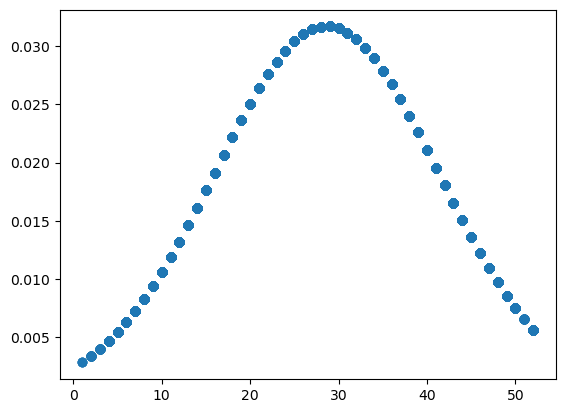

In [55]:
plt.scatter(hg_array, pdf_values)   
plt.show

In [56]:
#min max scaling
def min_max(array):
    min_value = np.min(array)
    max_value = np.max(array)
    return (array-min_value)/(max_value-min_value)

min_max(hg_array)
    

array([0.78431373, 0.39215686, 1.        , ..., 0.31372549, 0.33333333,
       0.29411765])